In [1]:

import os
import pandas as pd

# Step 1: Define the folder and filenames
folder_path = r'C:\Users\Dell\ongc'
file_names = ['file1.csv', 'file2.csv', 'file3.csv', 'file4.csv']

# Step 2: Define column names based on UNSW-NB15 dataset
column_names = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes',
                'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts',
                'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len',
                'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
                'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
                'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm',
                'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat', 'Label']

# Step 3: Read and combine all CSVs
dfs = []
for file in file_names:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None, low_memory=False)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Step 4: Assign headers
combined_df.columns = column_names

# Step 5: Show total number of rows
print("✅ Total number of rows after combining:", len(combined_df))

# (Optional) Step 6: Save the combined dataset
combined_df.to_csv(os.path.join(folder_path, 'combined_with_headers.csv'), index=False)

✅ Total number of rows after combining: 2540047


In [2]:
# Suppose this is your header list (example for UNSW-NB15 dataset)
headers = [
    'srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes',
    'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload',
    'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz',
    'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt',
    'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
    'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
    'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
    'ct_dst_src_ltm', 'attack_cat', 'Label'
]

# Assign header to your dataframe (assuming df is already loaded without header)
df.columns = headers

## Check unique values in the 'attack_category' column

In [3]:
# Check unique values in the 'attack_category' column
print(df['attack_cat'].unique())


[nan 'Exploits' ' Fuzzers ' 'Backdoor' 'DoS' 'Generic' ' Reconnaissance '
 ' Shellcode ' 'Analysis' 'Worms']


In [4]:
# Filter rows that are attacks (i.e., not 'Normal')
attack_rows = df[df['attack_cat'].str.lower() != 'normal']

# Check for missing or empty category names among attacks
missing_names = attack_rows['attack_cat'].isnull() | (attack_rows['attack_cat'].str.strip() == '')

if missing_names.any():
    print("⚠️ Some attack rows have no name:")
    print(attack_rows[missing_names])
else:
    print("✅ All attack rows have valid names in 'attack_cat'.")


⚠️ Some attack rows have no name:
             srcip  sport          dstip dsport proto state       dur  sbytes  \
0       59.166.0.9   7045  149.171.126.7     25   tcp   FIN  0.201886   37552   
1       59.166.0.9   9685  149.171.126.2     80   tcp   FIN  5.864748   19410   
2       59.166.0.2   1421  149.171.126.4     53   udp   CON  0.001391     146   
3       59.166.0.2  21553  149.171.126.2     25   tcp   FIN  0.053948   37812   
4       59.166.0.8  45212  149.171.126.4     53   udp   CON  0.000953     146   
...            ...    ...            ...    ...   ...   ...       ...     ...   
440038  59.166.0.1  38606  149.171.126.9     80   tcp   CON  0.564998   14106   
440039  59.166.0.5  33094  149.171.126.7  43433   tcp   FIN  0.087306     320   
440040  59.166.0.7  20848  149.171.126.4     21   tcp   CON  0.365058     456   
440041  59.166.0.3  21511  149.171.126.9     21   tcp   CON  6.335154    1802   
440042  59.166.0.9  35433  149.171.126.0     80   tcp   CON  2.200934    34

In [5]:
# Filter rows where an attack has occurred (Label == 1)
attack_rows = df[df['Label'] == 1]

# Check for missing or empty attack category names
missing_names = attack_rows['attack_cat'].isnull() | (attack_rows['attack_cat'].str.strip() == '')

if missing_names.any():
    print("⚠️ Some attack rows (Label=1) have no name in 'attack_cat':")
    print(attack_rows[missing_names])
else:
    print("✅ All attack rows (Label=1) have valid names in 'attack_cat'.")


✅ All attack rows (Label=1) have valid names in 'attack_cat'.


## Replacing nan with some other name

In [6]:
df['attack_cat'] = df['attack_cat'].fillna('No Attack')

In [7]:
# Check unique values in the 'attack_category' column
print(df['attack_cat'].unique())

['No Attack' 'Exploits' ' Fuzzers ' 'Backdoor' 'DoS' 'Generic'
 ' Reconnaissance ' ' Shellcode ' 'Analysis' 'Worms']


## Droping unnnecessary column

In [8]:
df = df.drop(['ct_flw_http_mthd', 'is_ftp_login'], axis=1)


In [9]:
print(df.isnull().sum())

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ltm          0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
attack_cat

In [10]:
print(df.dtypes[df.dtypes == 'object'])


srcip         object
dstip         object
dsport        object
proto         object
state         object
service       object
ct_ftp_cmd    object
attack_cat    object
dtype: object


In [11]:
df = df.drop(['srcip', 'dstip'], axis=1)


## Performing one hot encoding

In [12]:
categorical_cols = ['proto', 'state', 'service', 'ct_ftp_cmd']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['attack_cat_encoded'] = le.fit_transform(df['attack_cat'].astype(str))


In [14]:
X = df.drop('attack_cat_encoded', axis=1)
y = df['attack_cat_encoded']


In [15]:
df.head()


,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,ct_ftp_cmd_1,ct_ftp_cmd_2,ct_ftp_cmd_4,attack_cat_encoded
0,7045,25,0.201886,37552,3380,31,29,18,8,1.459438e+06,...,False,False,True,False,False,False,False,False,False,8
1,9685,80,5.864748,19410,1087890,31,29,2,370,2.640454e+04,...,False,False,False,False,False,False,False,False,False,8
2,1421,53,0.001391,146,178,31,29,0,0,4.198418e+05,...,False,False,False,False,False,False,False,False,False,8
3,21553,25,0.053948,37812,3380,31,29,19,8,5.503374e+06,...,False,False,True,False,False,False,False,False,False,8
4,45212,53,0.000953,146,178,31,29,0,0,6.128017e+05,...,False,False,False,False,False,False,False,False,False,8


In [16]:
# Convert multi-class label to binary: 0 = No Attack, 1 = Attack
df['binary_label'] = df['attack_cat_encoded'].apply(lambda x: 0 if x == 8 else 1)


In [17]:
df.head()

,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,ct_ftp_cmd_1,ct_ftp_cmd_2,ct_ftp_cmd_4,attack_cat_encoded,binary_label
0,7045,25,0.201886,37552,3380,31,29,18,8,1.459438e+06,...,False,True,False,False,False,False,False,False,8,0
1,9685,80,5.864748,19410,1087890,31,29,2,370,2.640454e+04,...,False,False,False,False,False,False,False,False,8,0
2,1421,53,0.001391,146,178,31,29,0,0,4.198418e+05,...,False,False,False,False,False,False,False,False,8,0
3,21553,25,0.053948,37812,3380,31,29,19,8,5.503374e+06,...,False,True,False,False,False,False,False,False,8,0
4,45212,53,0.000953,146,178,31,29,0,0,6.128017e+05,...,False,False,False,False,False,False,False,False,8,0


## Train test split

In [18]:
from sklearn.model_selection import train_test_split

# X = all features
# y = binary_label (your target)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                # features and target
    test_size=0.2,       # 20% test, 80% train
    random_state=42,     # for reproducibility
    stratify=y           # maintains class balance in train/test
)

# Confirm the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())


X_train shape: (352035, 201)
X_test shape: (88009, 201)
y_train distribution:
 attack_cat_encoded
8    280920
7     49502
6      9151
0      4312
5      3926
1      2824
3       536
4       533
2       297
9        34
Name: count, dtype: int64
y_test distribution:
 attack_cat_encoded
8    70230
7    12376
6     2288
0     1078
5      981
1      706
3      134
4      133
2       74
9        9
Name: count, dtype: int64


In [19]:
non_numeric_cols = X_train.select_dtypes(include='object').columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['dsport', 'attack_cat'], dtype='object')


In [20]:
X_train = X_train.drop(['dsport', 'attack_cat'], axis=1, errors='ignore')
X_test = X_test.drop(['dsport', 'attack_cat'], axis=1, errors='ignore')


## Top 50 features selection

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 50 features
selector = SelectKBest(score_func=f_classif, k=50)
X_train_selected = selector.fit_transform(X_train, y_train)  # or y_train_bin if binary
X_test_selected = selector.transform(X_test)

# Optional: See feature names
selected_features = X_train.columns[selector.get_support()]
print("Top 50 selected features:\n", selected_features)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Top 50 selected features:
 Index(['sport', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss',
       'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb',
       'smeansz', 'dmeansz', 'trans_depth', 'Sjit', 'Djit', 'tcprtt', 'synack',
       'ackdat', 'ct_state_ttl', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
       'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'Label', 'proto_any', 'proto_gre', 'proto_ospf', 'proto_sctp',
       'proto_tcp', 'proto_udp', 'proto_unas', 'state_CON', 'state_FIN',
       'state_INT', 'service_dns', 'service_ftp', 'service_ftp-data',
       'service_http', 'service_pop3', 'service_smtp', 'service_snmp'],
      dtype='object')


In [22]:
# Drop 'Label' if it's in the selected features
if 'Label' in selected_features:
    selected_features = selected_features.drop('Label')

# Now re-select only valid features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


## Applying random forest algo

In [23]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Start the timer
start_time = time.time()

# 2. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)  # or y_train_bin if binary

# 3. Stop the timer
training_time = time.time() - start_time

# 4. Predict
y_pred = model.predict(X_test_selected)

# 5. Evaluate
accuracy = accuracy_score(y_test, y_pred)  # or y_test_bin if binary
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 6. Print results
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"⏱️ Training Time: {training_time:.2f} seconds\n")
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n📋 Classification Report:\n", report)


✅ Accuracy: 0.9704
⏱️ Training Time: 92.64 seconds

📊 Confusion Matrix:
 [[  626     3    12     1     0    38    80     3   315     0]
 [    1   536     1     0     0    44   124     0     0     0]
 [    5     5    40     0     0     2    11     0    11     0]
 [    0     0     0     6     0    47    61     0    20     0]
 [    0     1     0     0    10    40    82     0     0     0]
 [    4     4     7     0     0   261   684     9    12     0]
 [   18    30    10     0     3   411  1742    20    53     1]
 [    1     2     1     0     1    50   129 12181    10     1]
 [  196     0     3     0     0     3    23     3 70002     0]
 [    0     0     0     0     0     0     8     0     0     1]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65      1078
           1       0.92      0.76      0.83       706
           2       0.54      0.54      0.54        74
           3       0.86      0.04      0.09       13

## Saving model 

In [24]:
import joblib

# Save trained model
joblib.dump(model, 'nids_model.pkl')

# Save the column names of one-hot encoded features
joblib.dump(X_train.columns.tolist(), 'model_features.pkl')

# Save label encoder (optional)
label_map = {0: "Normal", 1: "DoS", 2: "Probe", 3: "R2L", 4: "U2R"}  # adjust this to match your encoding
joblib.dump(label_map, 'label_map.pkl')


['label_map.pkl']

In [25]:
X_test.to_csv("test_input.csv", index=False)


## Applying XGBoost algo

In [26]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
import time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Start timing
start_time = time.time()

# 2. Initialize XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 3. Fit the model
xgb_model.fit(X_train_selected, y_train)  # or y_train_bin if binary

# 4. End timing
training_time = time.time() - start_time

# 5. Predict
y_pred = xgb_model.predict(X_test_selected)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)  # or y_test_bin
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 7. Print results
print(f"✅ XGBoost Accuracy: {accuracy:.4f}")
print(f"⏱️ Training Time: {training_time:.2f} seconds\n")
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n📋 Classification Report:\n", report)


C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [19:46:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.9713
⏱️ Training Time: 123.50 seconds

📊 Confusion Matrix:
 [[  611     3     9     1     0    35    83     3   333     0]
 [    1   532     1     0     0    33   137     1     0     1]
 [    7     3    45     0     0     0    10     0     9     0]
 [    0     0     0     6     0    36    72     0    20     0]
 [    0     1     0     0     9    35    87     0     1     0]
 [    4     4     7     0     1   255   691     6    13     0]
 [   24    36    12     0     2   268  1862    24    58     2]
 [    6     2     2     0     2    30   141 12183    10     0]
 [  208     0     7     3     0     3    25     2 69982     0]
 [    0     0     0     0     0     1     6     0     0     2]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.57      0.63      1078
           1       0.92      0.75      0.83       706
           2       0.54      0.61      0.57        74
           3       0.60      0.04      0.08

## Applying Lightgbm algo

In [28]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [29]:
import time
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Start timing
start_time = time.time()

# 2. Initialize LightGBM
lgbm_model = LGBMClassifier(random_state=42)

# 3. Train the model
lgbm_model.fit(X_train_selected, y_train)  # or y_train_bin if binary

# 4. End timing
training_time = time.time() - start_time

# 5. Predict
y_pred = lgbm_model.predict(X_test_selected)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_pred)  # or y_test_bin
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 7. Print results
print(f"✅ LightGBM Accuracy: {accuracy:.4f}")
print(f"⏱️ Training Time: {training_time:.2f} seconds\n")
print("📊 Confusion Matrix:\n", conf_matrix)
print("\n📋 Classification Report:\n", report)


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4955
[LightGBM] [Info] Number of data points in the train set: 352035, number of used features: 49
[LightGBM] [Info] Start training from score -4.402329
[LightGBM] [Info] Start training from score -4.825576
[LightGBM] [Info] Start training from score -7.077754
[LightGBM] [Info] Start training from score -6.487352
[LightGBM] [Info] Start training from score -6.492964
[LightGBM] [Info] Start training from score -4.496110
[LightGBM] [Info] Start training from score -3.649867
[LightGBM] [Info] Start training from score -1.961718
[LightGBM] [Info] Start training from score -0.225661
[LightGBM] [Info] Start training from score -9.245125
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [34]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import time

# Dictionaries to store results
results = {}
conf_matrices = {}

# ✅ Use your actual model variable names
models = {
    'LightGBM': lgbm_model,
    'Random Forest': model,       # replace with your actual RF model variable if different
    'XGBoost': xgb_model             # replace with your actual XGBoost model variable if different
}

for name, model in models.items():
    start = time.time()
    
    # Use the same features used during training
    y_pred = model.predict(X_test_selected)
    
    end = time.time()

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Training Time': end - start
    }

    conf_matrices[name] = confusion_matrix(y_test, y_pred)


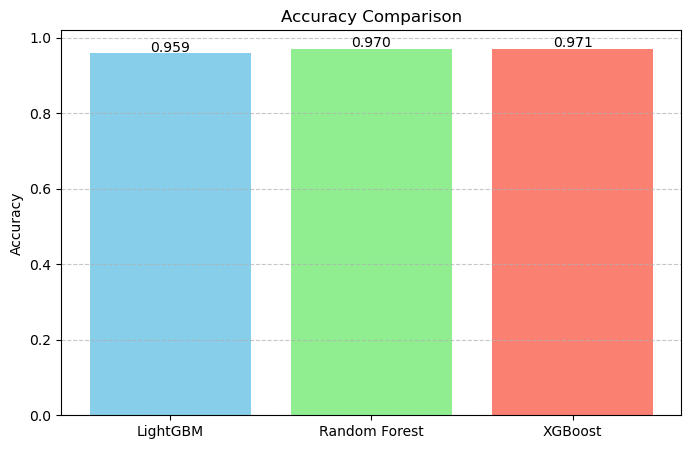

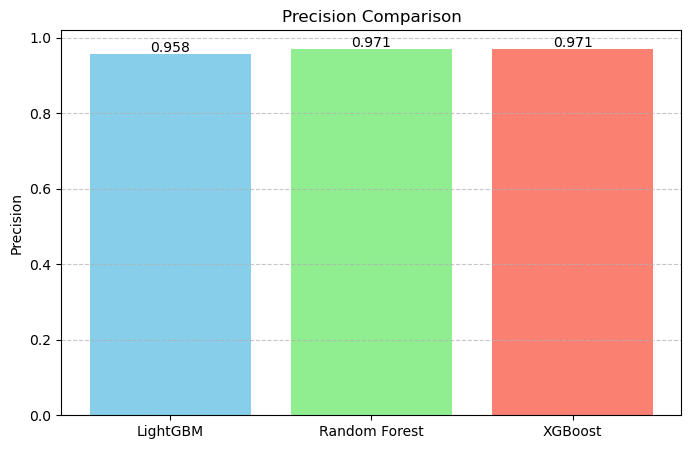

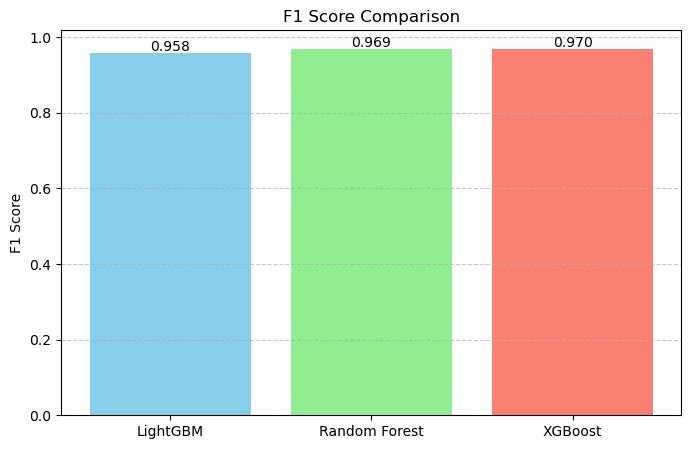

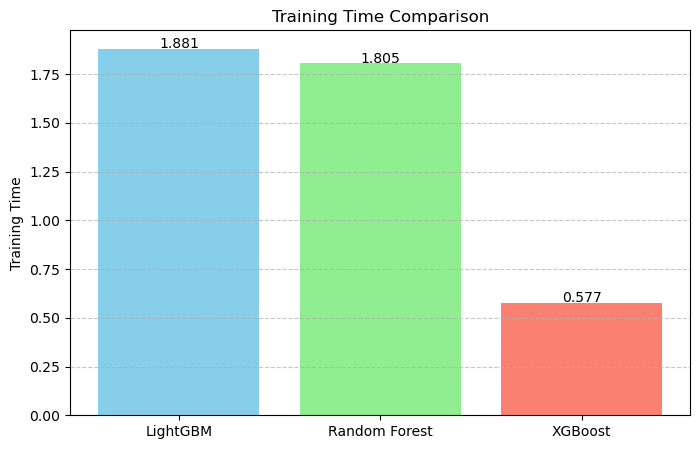

In [35]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'F1 Score', 'Training Time']
model_names = list(results.keys())

for metric in metrics:
    plt.figure(figsize=(8, 5))
    values = [results[model][metric] for model in model_names]
    bars = plt.bar(model_names, values, color=['skyblue', 'lightgreen', 'salmon'])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}', ha='center')

    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


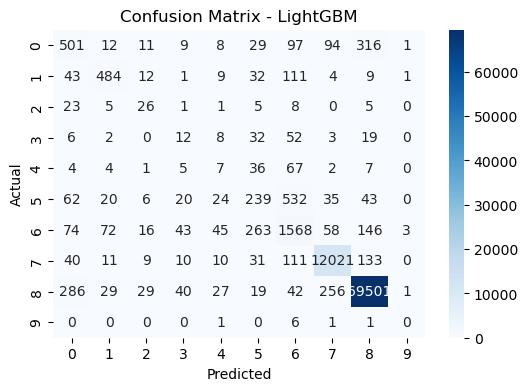

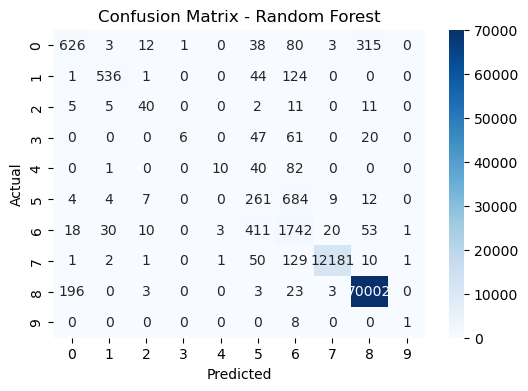

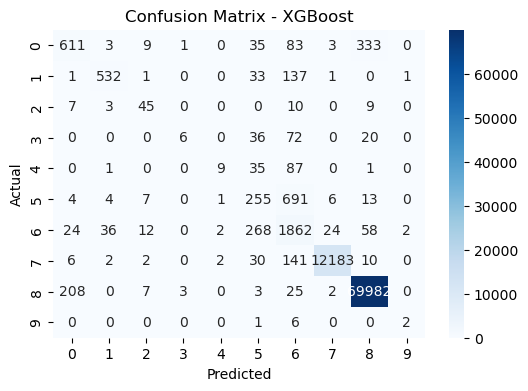

In [36]:
import seaborn as sns

for model_name, cm in conf_matrices.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## Count of Attack Category

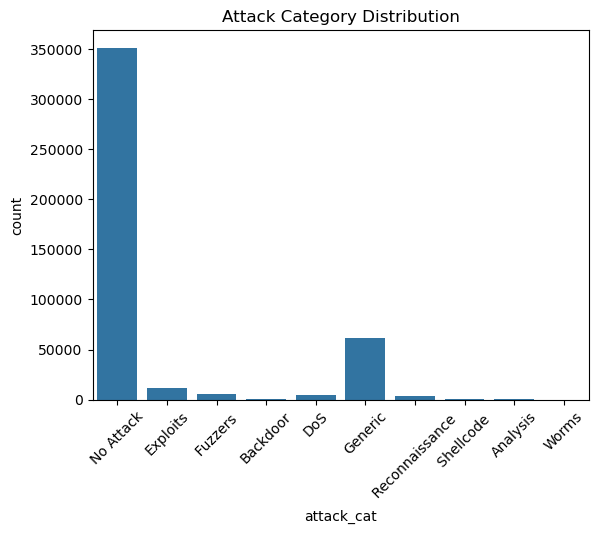

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='attack_cat')
plt.title('Attack Category Distribution')
plt.xticks(rotation=45)
plt.show()


## relationships between numerical features, detect redundancy or highly correlated fields.

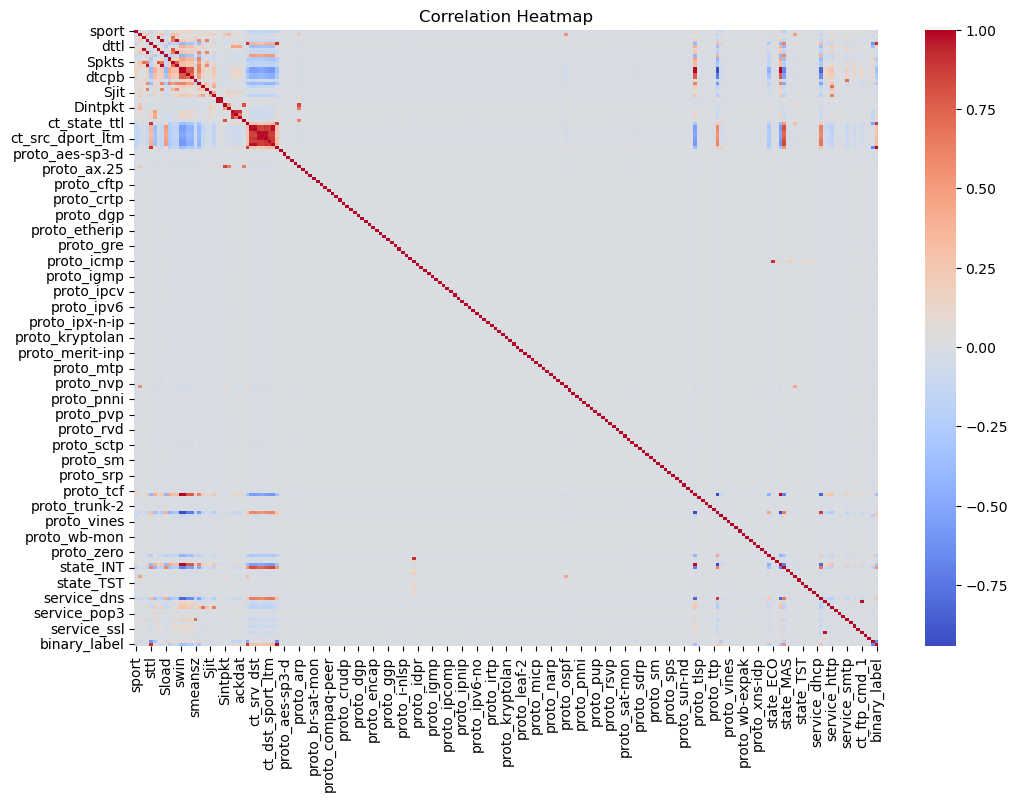

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


## Feature Importance 

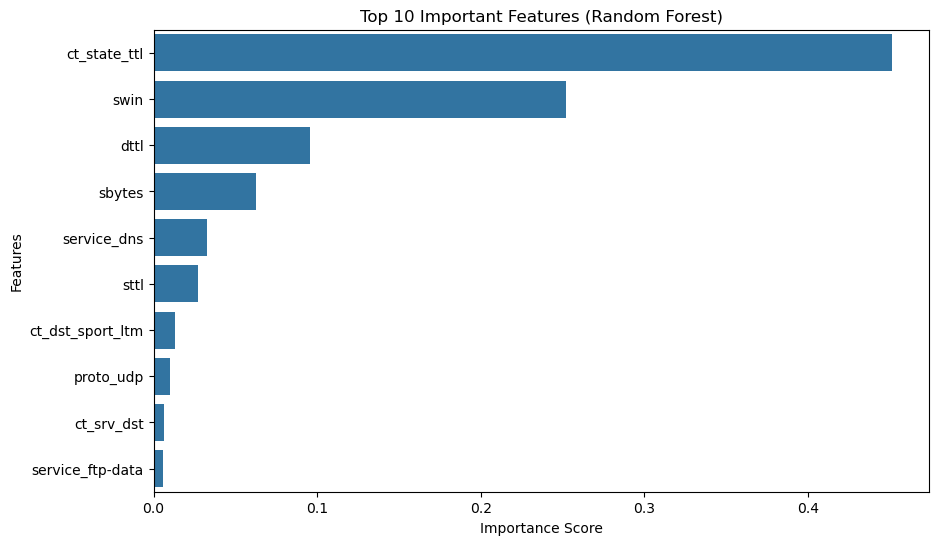

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use correct column names from selected features
feature_importances = pd.Series(model.feature_importances_, index=X_train_selected.columns)

# Top 10 most important features
top_features = feature_importances.nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
